In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [4]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

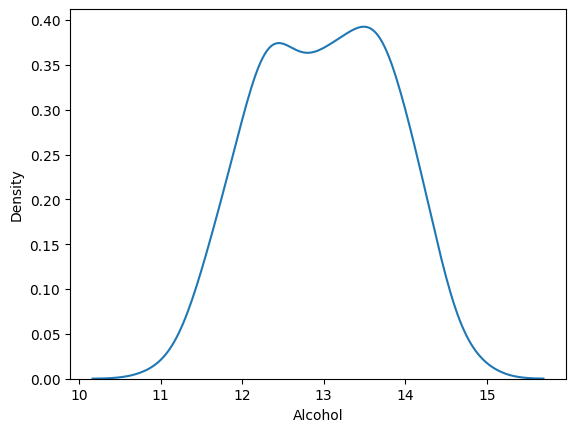

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

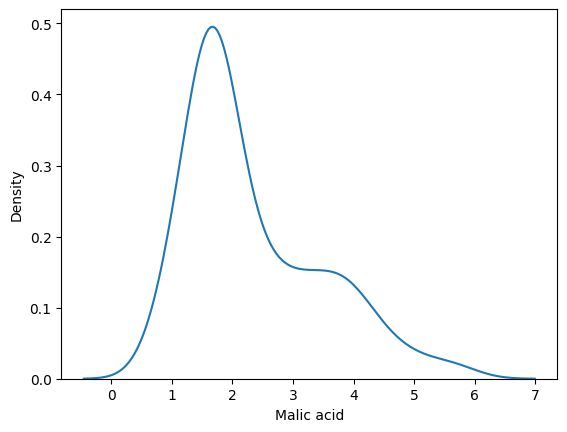

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

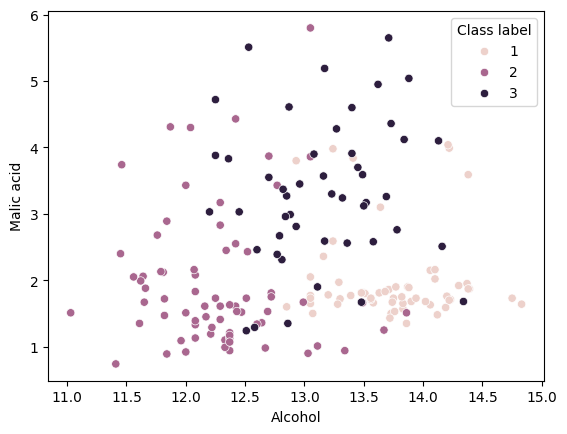

In [7]:
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'])

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1), df['Class label'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_normalized = scaler.transform(x_train)
x_test_normalized = scaler.transform(x_test)


In [11]:
x_train_normalized

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [12]:
x_train_normalized = pd.DataFrame(x_train_normalized, columns=x_train.columns)
x_test_normalized = pd.DataFrame(x_test_normalized, columns=x_test.columns)

In [13]:
x_train_normalized

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [14]:
np.round(x_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [16]:
np.round(x_train_normalized.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


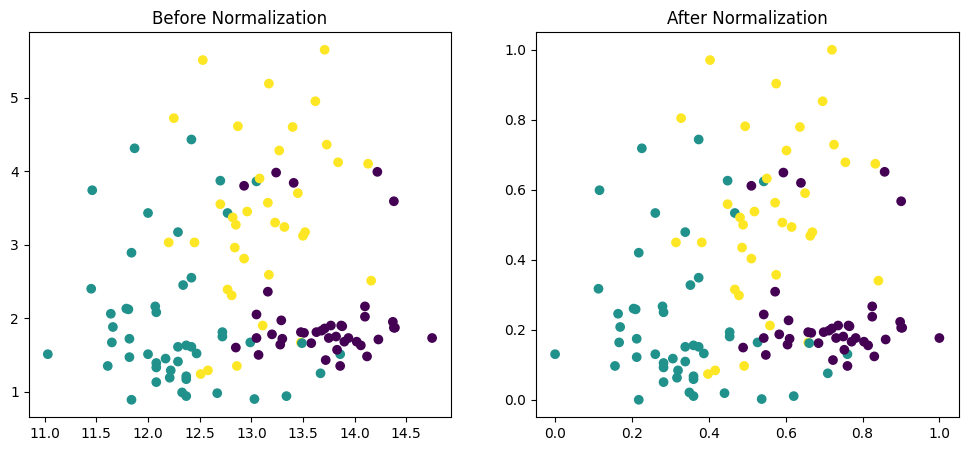

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'], c=y_train)
ax1.set_title("Before Normalization")

ax2.scatter(x_train_normalized['Alcohol'], x_train_normalized['Malic acid'], c=y_train)
ax2.set_title("After Normalization")

plt.show()

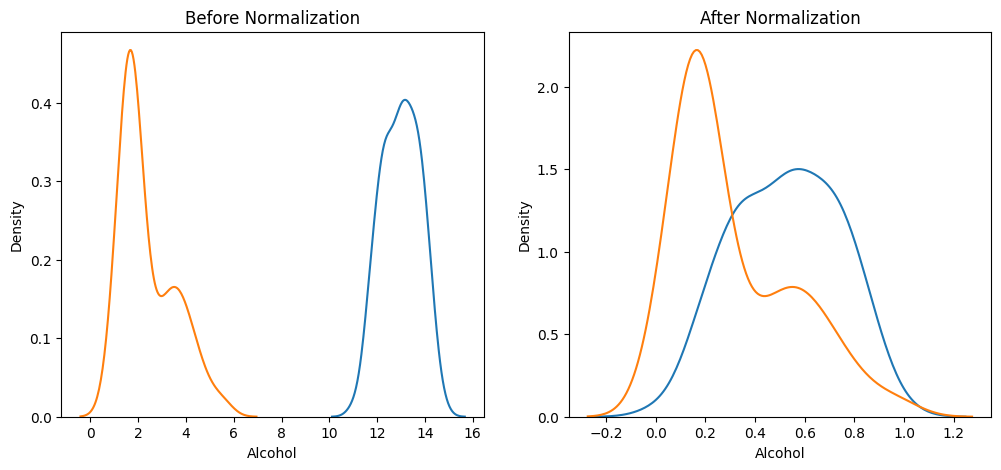

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Normalization")
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

ax2.set_title("After Normalization")
sns.kdeplot(x_train_normalized['Alcohol'], ax=ax2)
sns.kdeplot(x_train_normalized['Malic acid'], ax=ax2)

plt.show()

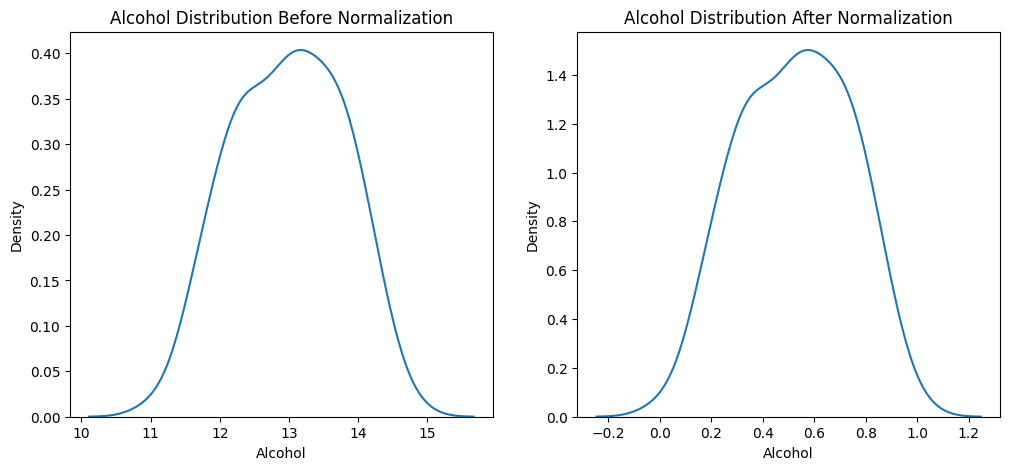

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Alcohol Distribution Before Normalization")
sns.kdeplot(x_train['Alcohol'], ax=ax1)

ax2.set_title("Alcohol Distribution After Normalization")
sns.kdeplot(x_train_normalized['Alcohol'], ax=ax2)

plt.show()

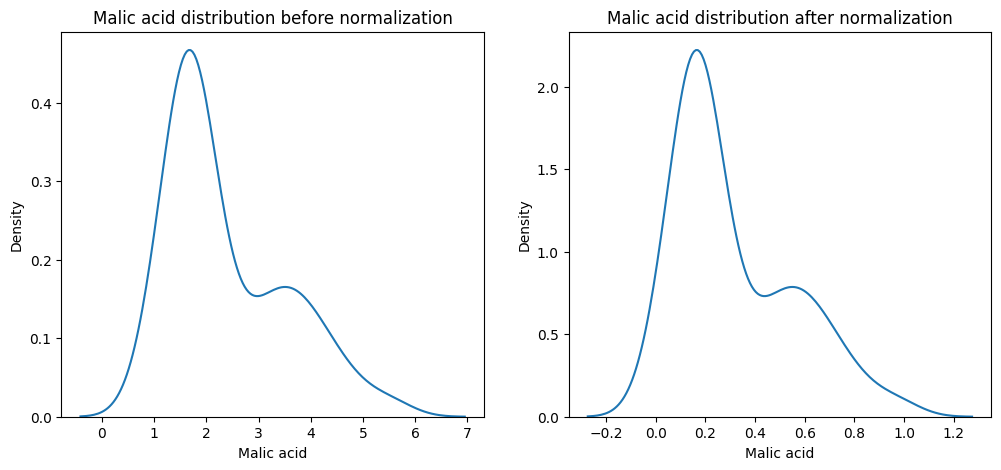

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Malic acid distribution before normalization")
sns.kdeplot(x_train['Malic acid'], ax=ax1)

ax2.set_title("Malic acid distribution after normalization")
sns.kdeplot(x_train_normalized['Malic acid'], ax=ax2)

plt.show()